# DESARROLLO DE MODELO Y ANÁLISIS EXPLORATORIO DE DATOS

In [1]:
import pandas as pd

In [2]:
# Leer el archivo CSV en un DataFrame de pandas
df_tvc = pd.read_csv('4. Traffic_Volume_Counts_v4_FINAL.csv')

In [3]:
df_tvc

,ID,SegmentID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Latitude,Longitude,location_id
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20.0,10.0,11.0,...,120.0,91.0,83.0,74.0,49.0,42.0,42.0,40.852234,-73.788065,46
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21.0,16.0,8.0,...,131.0,95.0,73.0,70.0,63.0,42.0,35.0,40.852234,-73.788065,46
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27.0,14.0,6.0,...,143.0,106.0,89.0,68.0,64.0,56.0,43.0,40.852234,-73.788065,46
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22.0,7.0,7.0,...,144.0,122.0,76.0,64.0,58.0,64.0,43.0,40.852234,-73.788065,46
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31.0,17.0,7.0,...,135.0,102.0,106.0,58.0,58.0,55.0,54.0,40.852234,-73.788065,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/18/2020,68.0,63.0,31.0,...,164.0,183.0,173.0,143.0,113.0,127.0,133.0,40.759810,-73.982155,230
41171,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/19/2020,71.0,59.0,42.0,...,182.0,180.0,190.0,162.0,155.0,234.0,166.0,40.759810,-73.982155,230
41172,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/20/2020,111.0,79.0,54.0,...,158.0,194.0,196.0,222.0,174.0,182.0,178.0,40.759810,-73.982155,230
41173,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/21/2020,129.0,95.0,63.0,...,183.0,163.0,184.0,183.0,169.0,187.0,211.0,40.759810,-73.982155,230


### Se vuelcan los datos de las columnas a las filas (derretir) 

In [4]:
import pandas as pd

# Seleccionar las columnas a derretir en filas
columnas_a_derretir = df_tvc.iloc[:, 6:-3]

# Derretir las columnas en filas
df_melted = pd.melt(df_tvc, id_vars=['Date', 'location_id'], 
                    value_vars=columnas_a_derretir.columns, 
                    var_name='Hour', value_name='Volume')

# Ordenar el DataFrame resultante por fecha y hora
df_melted.sort_values(by=['Date', 'Hour'], inplace=True)

# Mostrar la información del DataFrame resultante
df_melted.info()


<class 'pandas.core.frame.DataFrame'>
Index: 988200 entries, 411989 to 905480
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         988200 non-null  object 
 1   location_id  988200 non-null  object 
 2   Hour         988200 non-null  object 
 3   Volume       988200 non-null  float64
dtypes: float64(1), object(3)
memory usage: 37.7+ MB


In [5]:
df_melted

,Date,location_id,Hour,Volume
411989,01/08/2012,No encontrado,10:00-11:00AM,233.0
411994,01/08/2012,No encontrado,10:00-11:00AM,117.0
412041,01/08/2012,84,10:00-11:00AM,98.0
412046,01/08/2012,189,10:00-11:00AM,244.0
412051,01/08/2012,189,10:00-11:00AM,193.0
...,...,...,...,...
823130,12/13/2020,230,7:00-8:00PM,268.0
370205,12/13/2020,230,8:00-9:00AM,81.0
864305,12/13/2020,230,8:00-9:00PM,256.0
411380,12/13/2020,230,9:00-10:00AM,118.0


### Se reasignan nombre a los horarios

In [6]:
# Crea un diccionario para mapear los nombres de las columnas actuales a los nombres deseados
nuevos_nombres = {
    '12:00-1:00 AM': 0,
    '1:00-2:00AM': 1,
    '2:00-3:00AM': 2,
    '3:00-4:00AM': 3,
    '4:00-5:00AM': 4,
    '5:00-6:00AM': 5,
    '6:00-7:00AM': 6,
    '7:00-8:00AM': 7,
    '8:00-9:00AM': 8,
    '9:00-10:00AM': 9,
    '10:00-11:00AM': 10,
    '11:00-12:00PM': 11,
    '12:00-1:00PM': 12,
    '1:00-2:00PM': 13,
    '2:00-3:00PM': 14,
    '3:00-4:00PM': 15,
    '4:00-5:00PM': 16,
    '5:00-6:00PM': 17,
    '6:00-7:00PM': 18,
    '7:00-8:00PM': 19,
    '8:00-9:00PM': 20,
    '9:00-10:00PM': 21,
    '10:00-11:00PM': 22,
    '11:00-12:00AM': 23
}

# Cambiar los nombres de las columnas 'Hour' según el diccionario
df_melted['Hour'].replace(nuevos_nombres, inplace=True)

# Mostrar los primeros registros del DataFrame resultante
print(df_melted.head())


              Date    location_id  Hour  Volume
411989  01/08/2012  No encontrado    10   233.0
411994  01/08/2012  No encontrado    10   117.0
412041  01/08/2012             84    10    98.0
412046  01/08/2012            189    10   244.0
412051  01/08/2012            189    10   193.0


In [7]:
df_melted

,Date,location_id,Hour,Volume
411989,01/08/2012,No encontrado,10,233.0
411994,01/08/2012,No encontrado,10,117.0
412041,01/08/2012,84,10,98.0
412046,01/08/2012,189,10,244.0
412051,01/08/2012,189,10,193.0
...,...,...,...,...
823130,12/13/2020,230,19,268.0
370205,12/13/2020,230,8,81.0
864305,12/13/2020,230,20,256.0
411380,12/13/2020,230,9,118.0


### Se filtran los registros sin identificación de zona de Taxi

In [8]:
# Filtrar los registros donde 'location_id' es igual a 'No encontrado'
df_filtered = df_melted.loc[df_melted['location_id'] != 'No encontrado']

# Mostrar los primeros registros del DataFrame resultante
df_filtered


,Date,location_id,Hour,Volume
412041,01/08/2012,84,10,98.0
412046,01/08/2012,189,10,244.0
412051,01/08/2012,189,10,193.0
906141,01/08/2012,84,22,36.0
906146,01/08/2012,189,22,116.0
...,...,...,...,...
823130,12/13/2020,230,19,268.0
370205,12/13/2020,230,8,81.0
864305,12/13/2020,230,20,256.0
411380,12/13/2020,230,9,118.0


### Se crean y ajustan las variables temporales

In [9]:
# Convertir la columna 'Date' a tipo datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Extraer los componentes de fecha
df_filtered['year'] = df_filtered['Date'].dt.year
df_filtered['month'] = df_filtered['Date'].dt.month
df_filtered['day'] = df_filtered['Date'].dt.day
df_filtered['day_week'] = df_filtered['Date'].dt.dayofweek

df_filtered

C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\2743104763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\2743104763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['Date'].dt.year
C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\2743104763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Date,location_id,Hour,Volume,year,month,day,day_week
412041,2012-01-08,84,10,98.0,2012,1,8,6
412046,2012-01-08,189,10,244.0,2012,1,8,6
412051,2012-01-08,189,10,193.0,2012,1,8,6
906141,2012-01-08,84,22,36.0,2012,1,8,6
906146,2012-01-08,189,22,116.0,2012,1,8,6
...,...,...,...,...,...,...,...,...
823130,2020-12-13,230,19,268.0,2020,12,13,6
370205,2020-12-13,230,8,81.0,2020,12,13,6
864305,2020-12-13,230,20,256.0,2020,12,13,6
411380,2020-12-13,230,9,118.0,2020,12,13,6


### Reordenamiento de columnas

In [10]:
# Define el nuevo orden de las columnas
new_column_order = ['Date', 'year', 'month', 'day', 'day_week', 'Hour', 'location_id', 'Volume']

# Reordena las columnas del DataFrame
df_filtered = df_filtered.reindex(columns=new_column_order)

# Muestra los primeros registros del DataFrame con las columnas reordenadas

df_filtered

,Date,year,month,day,day_week,Hour,location_id,Volume
412041,2012-01-08,2012,1,8,6,10,84,98.0
412046,2012-01-08,2012,1,8,6,10,189,244.0
412051,2012-01-08,2012,1,8,6,10,189,193.0
906141,2012-01-08,2012,1,8,6,22,84,36.0
906146,2012-01-08,2012,1,8,6,22,189,116.0
...,...,...,...,...,...,...,...,...
823130,2020-12-13,2020,12,13,6,19,230,268.0
370205,2020-12-13,2020,12,13,6,8,230,81.0
864305,2020-12-13,2020,12,13,6,20,230,256.0
411380,2020-12-13,2020,12,13,6,9,230,118.0


### Guardado parcial de dataframe

In [11]:
# Guarda el DataFrame en un archivo CSV
df_filtered.to_csv("Traffic_Volume_Counts_ML.csv", index=False)

In [12]:
# Leer el archivo CSV en un DataFrame de pandas
df_vol = pd.read_csv("Traffic_Volume_Counts_ML.csv")

In [13]:
df_vol

,Date,year,month,day,day_week,Hour,location_id,Volume
0,2012-01-08,2012,1,8,6,10,84,98.0
1,2012-01-08,2012,1,8,6,10,189,244.0
2,2012-01-08,2012,1,8,6,10,189,193.0
3,2012-01-08,2012,1,8,6,22,84,36.0
4,2012-01-08,2012,1,8,6,22,189,116.0
...,...,...,...,...,...,...,...,...
769579,2020-12-13,2020,12,13,6,19,230,268.0
769580,2020-12-13,2020,12,13,6,8,230,81.0
769581,2020-12-13,2020,12,13,6,20,230,256.0
769582,2020-12-13,2020,12,13,6,9,230,118.0


In [14]:
# Verifica que la columna 'Date' de df_vol sea de tipo datetime
if not pd.api.types.is_datetime64_any_dtype(df_vol['Date']):
    # Si la columna 'Date' no es de tipo datetime, conviértela
    df_vol['Date'] = pd.to_datetime(df_vol['Date'])

# Filtrar df_vol para los meses de junio (6), julio (7) y agosto (8)
df_vol_filtrado = df_vol[df_vol['Date'].dt.month.isin([6, 7, 8])]

# Mostrar los registros filtrados
print(df_vol_filtrado)

Empty DataFrame
Columns: [Date, year, month, day, day_week, Hour, location_id, Volume]
Index: []


### Se crea columna para la futura union de dataframes

In [15]:
# Crear la nueva columna con la combinación de 'day', 'day_week', 'Hour' y 'location_id'
df_vol['combined_column'] = df_vol['day_week'].astype(str) + '-' + df_vol['Hour'].astype(str) + '-' + df_vol['location_id'].astype(str)

In [16]:
df_vol

,Date,year,month,day,day_week,Hour,location_id,Volume,combined_column
0,2012-01-08,2012,1,8,6,10,84,98.0,6-10-84
1,2012-01-08,2012,1,8,6,10,189,244.0,6-10-189
2,2012-01-08,2012,1,8,6,10,189,193.0,6-10-189
3,2012-01-08,2012,1,8,6,22,84,36.0,6-22-84
4,2012-01-08,2012,1,8,6,22,189,116.0,6-22-189
...,...,...,...,...,...,...,...,...,...
769579,2020-12-13,2020,12,13,6,19,230,268.0,6-19-230
769580,2020-12-13,2020,12,13,6,8,230,81.0,6-8-230
769581,2020-12-13,2020,12,13,6,20,230,256.0,6-20-230
769582,2020-12-13,2020,12,13,6,9,230,118.0,6-9-230


### Se carga dataset de taxis

In [17]:
# Leer el archivo CSV en un DataFrame de pandas
df_yellow = pd.read_csv('yellowpreliminar.csv')

In [18]:
df_yellow

,Unnamed: 0,pickup_datetime,Year,Month,Day,DayofWeek,Hour,PULocationID,pickup_borough
0,0,2024-01-01,2024,1,1,0,0,186,Manhattan
1,1,2024-01-01,2024,1,1,0,0,140,Manhattan
2,2,2024-01-01,2024,1,1,0,0,236,Manhattan
3,3,2024-01-01,2024,1,1,0,0,79,Manhattan
4,4,2024-01-01,2024,1,1,0,0,211,Manhattan
...,...,...,...,...,...,...,...,...,...
2964619,2964619,2024-01-31,2024,1,31,2,23,107,Manhattan
2964620,2964620,2024-01-31,2024,1,31,2,23,114,Manhattan
2964621,2964621,2024-01-31,2024,1,31,2,23,211,Manhattan
2964622,2964622,2024-01-31,2024,1,31,2,23,107,Manhattan


### Se crean y ajustan las variables temporales

In [19]:
# Eliminar la primera columna
df_yellow.drop(columns=['Unnamed: 0'], inplace=True)

# Renombrar las columnas
df_yellow.rename(columns={'pickup_datetime': 'Date',
                          'Year': 'year',
                          'Month': 'month',
                          'Day': 'day',
                          'DayofWeek': 'day_week',
                          'PULocationID': 'location_id'}, inplace=True)

# Eliminar la columna 'pickup_borough'
df_yellow.drop(columns=['pickup_borough'], inplace=True)

In [20]:
df_yellow

,Date,year,month,day,day_week,Hour,location_id
0,2024-01-01,2024,1,1,0,0,186
1,2024-01-01,2024,1,1,0,0,140
2,2024-01-01,2024,1,1,0,0,236
3,2024-01-01,2024,1,1,0,0,79
4,2024-01-01,2024,1,1,0,0,211
...,...,...,...,...,...,...,...
2964619,2024-01-31,2024,1,31,2,23,107
2964620,2024-01-31,2024,1,31,2,23,114
2964621,2024-01-31,2024,1,31,2,23,211
2964622,2024-01-31,2024,1,31,2,23,107


### Se crea columna para union de dataframes

In [21]:
# Crear la nueva columna con la combinación de 'day', 'day_week', 'Hour' y 'location_id'
df_yellow['combined_column'] = df_yellow['day_week'].astype(str) + '-' + df_yellow['Hour'].astype(str) + '-' + df_yellow['location_id'].astype(str)

# Realizar un agrupamiento y sumar la cantidad de registros
df_new = df_yellow.groupby('combined_column').size().reset_index(name='count')


In [22]:
df_new

,combined_column,count
0,0-0-10,9
1,0-0-100,92
2,0-0-101,1
3,0-0-102,2
4,0-0-107,279
...,...,...
26494,6-9-90,145
26495,6-9-91,2
26496,6-9-93,4
26497,6-9-95,1


### Se realiza unión y filtrado de dataframes

In [23]:
# Realizar un merge entre df_vol y df_new utilizando combined_column como clave
df_merged = df_vol.merge(df_new, on='combined_column', how='left')


In [24]:
# Filtrar los NaN de df_merged
df_filtered = df_merged.dropna()

# Ver los primeros registros del DataFrame filtrado
df_filtered

,Date,year,month,day,day_week,Hour,location_id,Volume,combined_column,count
1,2012-01-08,2012,1,8,6,10,189,244.0,6-10-189,2.0
2,2012-01-08,2012,1,8,6,10,189,193.0,6-10-189,2.0
4,2012-01-08,2012,1,8,6,22,189,116.0,6-22-189,1.0
5,2012-01-08,2012,1,8,6,22,189,120.0,6-22-189,1.0
7,2012-01-08,2012,1,8,6,23,189,99.0,6-23-189,3.0
...,...,...,...,...,...,...,...,...,...,...
769579,2020-12-13,2020,12,13,6,19,230,268.0,6-19-230,589.0
769580,2020-12-13,2020,12,13,6,8,230,81.0,6-8-230,392.0
769581,2020-12-13,2020,12,13,6,20,230,256.0,6-20-230,579.0
769582,2020-12-13,2020,12,13,6,9,230,118.0,6-9-230,516.0


## Análisis exploratorio para modelo de ML

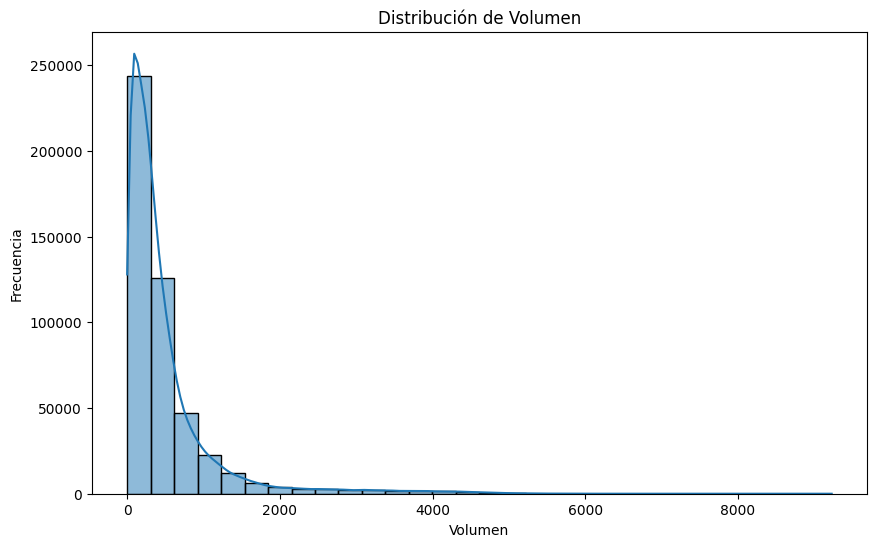

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='Volume', bins=30, kde=True)
plt.title('Distribución de Volumen')
plt.xlabel('Volumen')
plt.ylabel('Frecuencia')
plt.show()



C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\3256714618.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_week_nombre'] = df_filtered['day_week'].map(dias_semana_map)


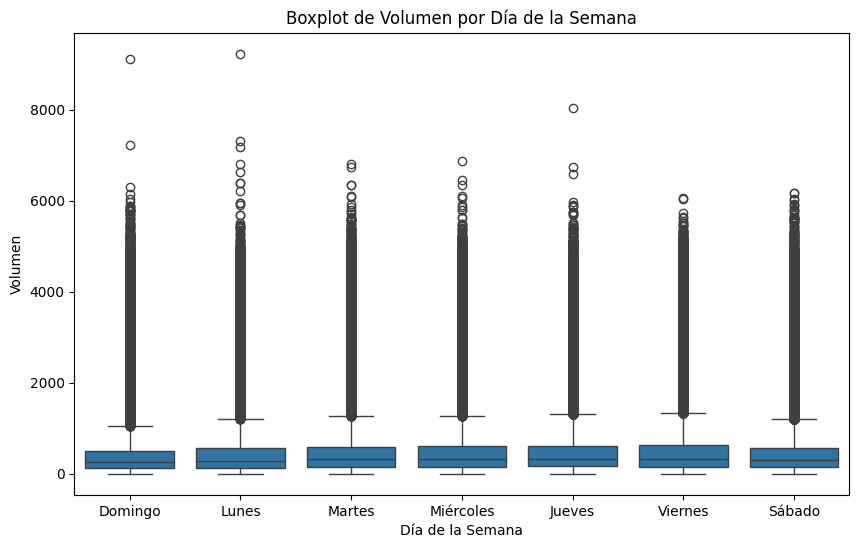

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de mapeo para convertir valores de day_week a nombres de días de la semana
dias_semana_map = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

# Mapear los valores de day_week a los nombres de días de la semana
df_filtered['day_week_nombre'] = df_filtered['day_week'].map(dias_semana_map)

# Crear el gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='day_week_nombre', y='Volume')
plt.title('Boxplot de Volumen por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Volumen')
plt.show()


### Análisis de Volumen de tráfico

El volumen de transito se concentra con mucho volumen con poca frecuencia. Se puede apreciar que existen muchas zonas y horarios donde se puede evitar la congestión.

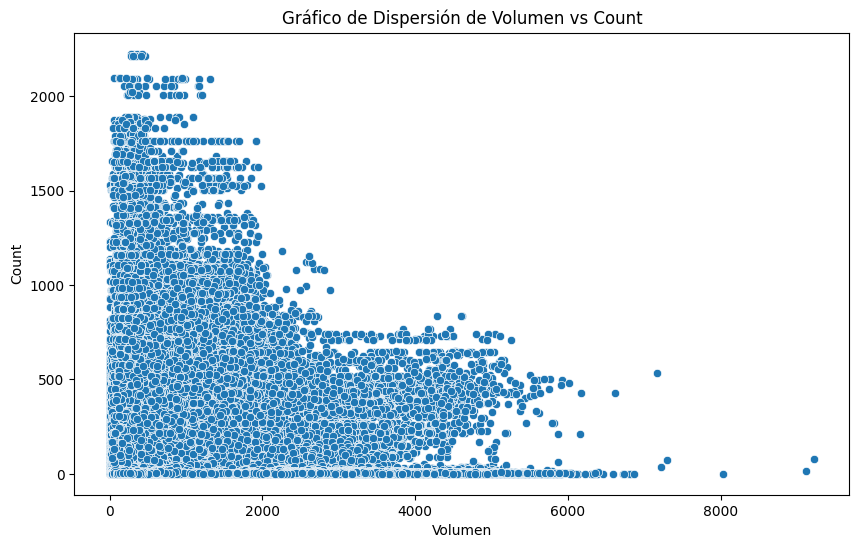

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Volume', y='count')
plt.title('Gráfico de Dispersión de Volumen vs Count')
plt.xlabel('Volumen')
plt.ylabel('Count')
plt.show()


Se puede apreciar que existe una zona **deseada** donde la cantidad de viajes (count) es muy alto para un volumen de tránsito muy bajo. Ese es el mejor escenario que se busca predecir para dar como herramienta al cliente. 

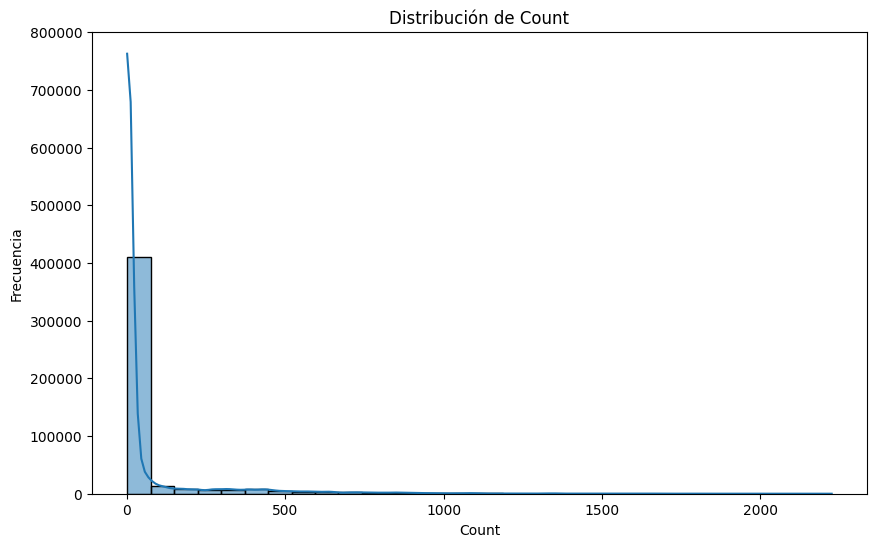

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='count', bins=30, kde=True)
plt.title('Distribución de Count')
plt.xlabel('Count')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\663544295.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_week_nombre'] = df_filtered['day_week'].map(dias_semana_map)


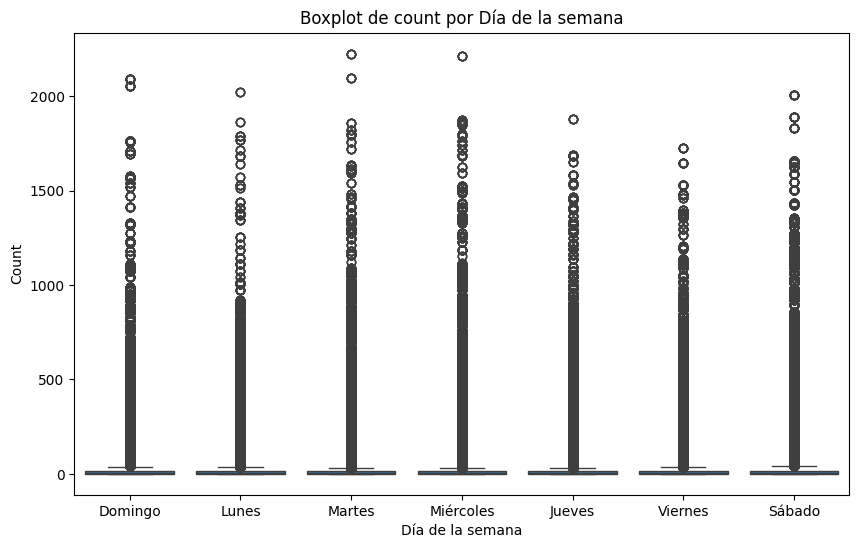

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de mapeo para convertir valores de day_week a nombres de días de la semana
dias_semana_map = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

# Mapear los valores de day_week a los nombres de días de la semana
df_filtered['day_week_nombre'] = df_filtered['day_week'].map(dias_semana_map)

# Crear el gráfico de boxplot para count por día de la semana
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='day_week_nombre', y='count')
plt.title('Boxplot de count por Día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Count')
plt.show()



Se aprecia que la cantidad de viajes se concentra mayoritariamente en valores menores a los 50, existiendo muchos outliers por cada día. 
Estos valores serán los más buscados para predecir. 

In [30]:
# Estadísticas descriptivas para 'Volume' y 'count'
descriptive_stats = df_filtered[['Volume', 'count']].describe()
print(descriptive_stats)


              Volume          count
count  477537.000000  477537.000000
mean      501.148604      65.472334
std       666.583644     186.485484
min         0.000000       1.000000
25%       139.000000       2.000000
50%       300.000000       4.000000
75%       572.000000      16.000000
max      9226.330000    2225.000000


Se puede ver con claridad, que un buen valor de cantidad de viajes se ubica por encima de los 16, y un valor deseable de volumen de tránsito debería estar por debajo de 139. 

In [31]:
# Matriz de correlación
correlation_matrix = df_filtered[['Volume', 'count']].corr()
print(correlation_matrix)


          Volume     count
Volume  1.000000  0.137475
count   0.137475  1.000000


A pesar de ser contraintuitivo, la correlación entre la cantidad de viajes y el volumen de transito para una zona y horario determinado es baja.

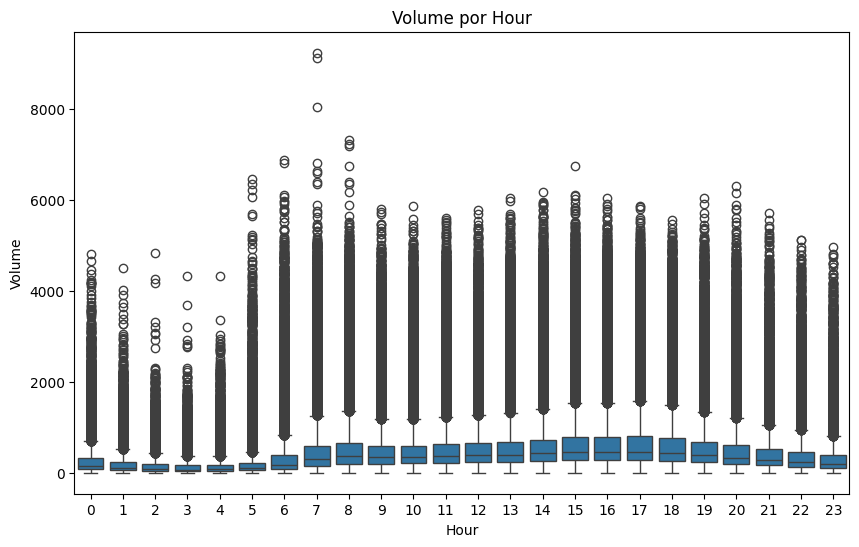

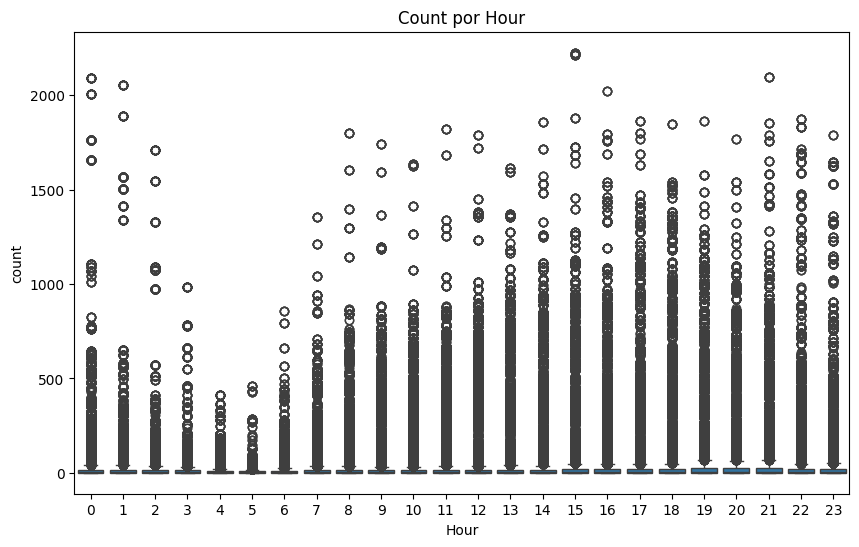

In [32]:
# Visualización de 'Volume' y 'count' por 'Hour'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='Volume', data=df_filtered)
plt.title('Volume por Hour')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='count', data=df_filtered)
plt.title('Count por Hour')
plt.show()


Tanto en relación al volumen de tráfico como en la cantidad de viajes, la distribución en los horarios es atomizada en valores bajos cercanos a la media, teniendo muchos outliers que pueden ser objetos de oportunidad.

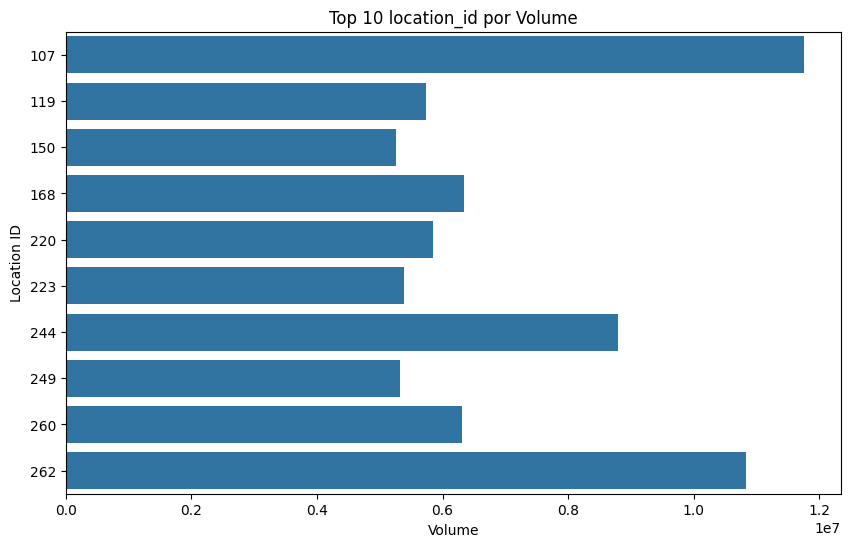

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongo que 'df_filtered' es tu dataframe filtrado con datos relevantes

# Agrupar df_filtered por location_id y calcular la suma de 'Volume' para cada location_id
df_grouped_volume = df_filtered.groupby('location_id')['Volume'].sum()

# Ordenar los resultados en orden descendente para 'Volume'
df_grouped_volume_sorted = df_grouped_volume.sort_values(ascending=False)

# Seleccionar el top 10 de location_id para 'Volume'
top_10_location_id_volume = df_grouped_volume_sorted.head(10)

# Mostrar el gráfico de barras lateral para 'Volume'
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_location_id_volume, y=top_10_location_id_volume.index, orient='h')
plt.title('Top 10 location_id por Volume')
plt.xlabel('Volume')
plt.ylabel('Location ID')
plt.show()




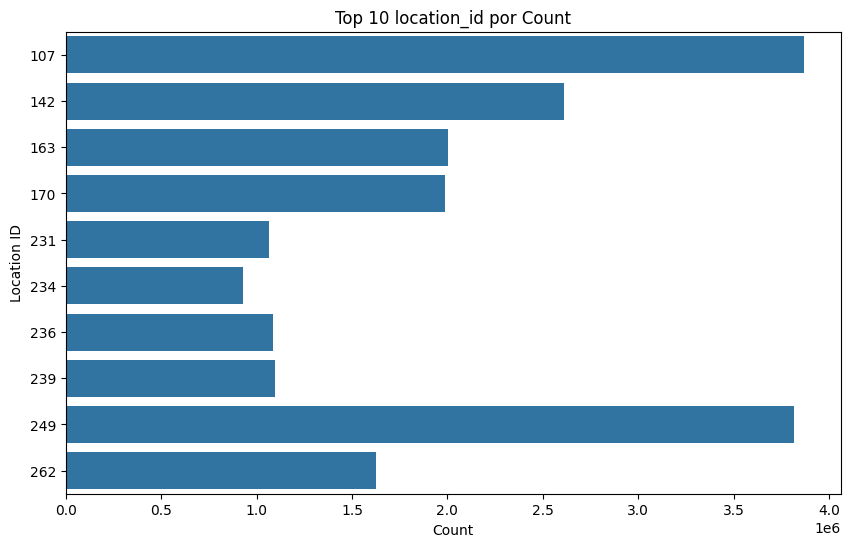

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongo que 'df_filtered' es tu dataframe filtrado con datos relevantes

# Agrupar df_filtered por location_id y calcular la suma de 'count' para cada location_id
df_grouped_count = df_filtered.groupby('location_id')['count'].sum()

# Ordenar los resultados en orden descendente para 'count'
df_grouped_count_sorted = df_grouped_count.sort_values(ascending=False)

# Seleccionar el top 10 de location_id para 'count'
top_10_location_id_count = df_grouped_count_sorted.head(10)

# Mostrar el gráfico de barras lateral para 'count'
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_location_id_count, y=top_10_location_id_count.index, orient='h')
plt.title('Top 10 location_id por Count')
plt.xlabel('Count')
plt.ylabel('Location ID')
plt.show()


Se observan coincidencias en las zonas dentro del top 10 para ambas variables, lo que es esperable. 

C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\3054075593.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_week_nombre'] = df_filtered['day_week'].map(dias_semana_map)
C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\3054075593.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_week_nombre', y='Volume', data=df_filtered, palette='viridis')


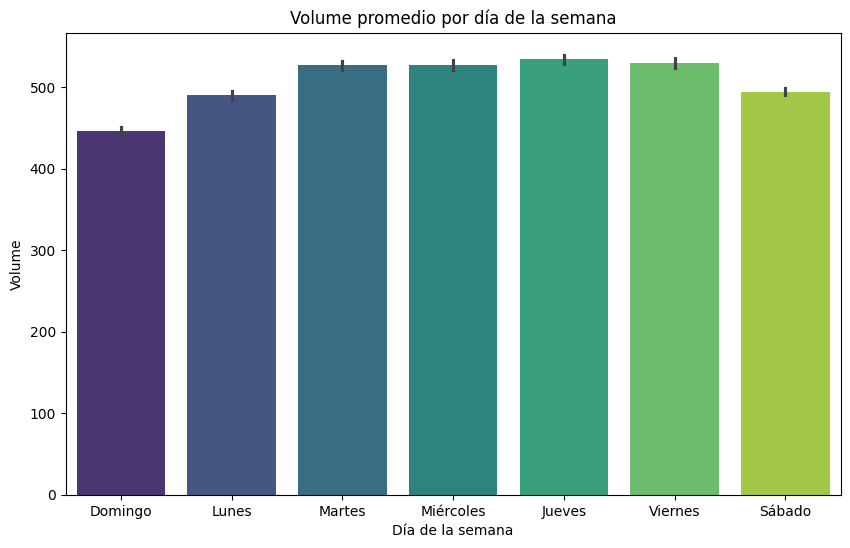

C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\3054075593.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_week_nombre', y='count', data=df_filtered, palette='viridis')


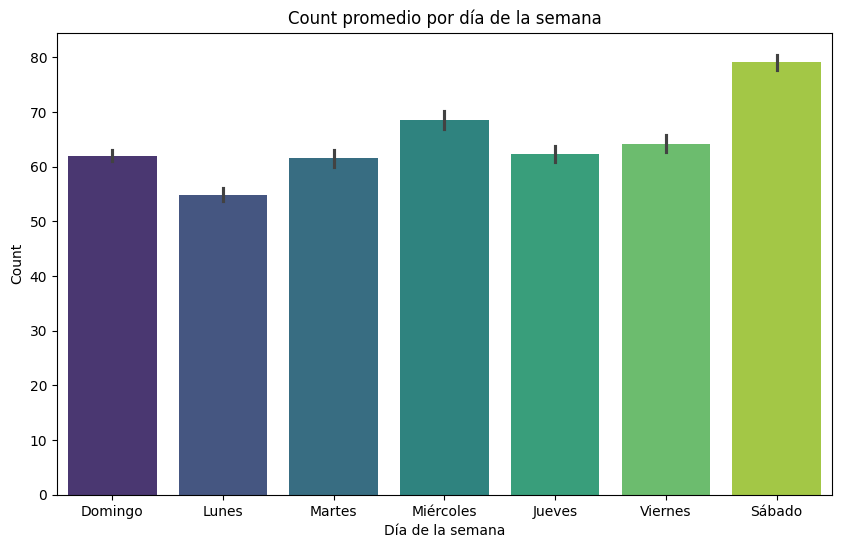

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de mapeo para convertir valores de day_week a nombres de días de la semana
dias_semana_map = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

# Mapear los valores de day_week a los nombres de días de la semana
df_filtered['day_week_nombre'] = df_filtered['day_week'].map(dias_semana_map)

# Gráfico de barras de 'Volume' por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x='day_week_nombre', y='Volume', data=df_filtered, palette='viridis')
plt.title('Volume promedio por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Volume')
plt.show()

# Gráfico de barras de 'count' por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x='day_week_nombre', y='count', data=df_filtered, palette='viridis')
plt.title('Count promedio por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Count')
plt.show()



C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\1380862661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Volume', data=df_filtered, palette='viridis')


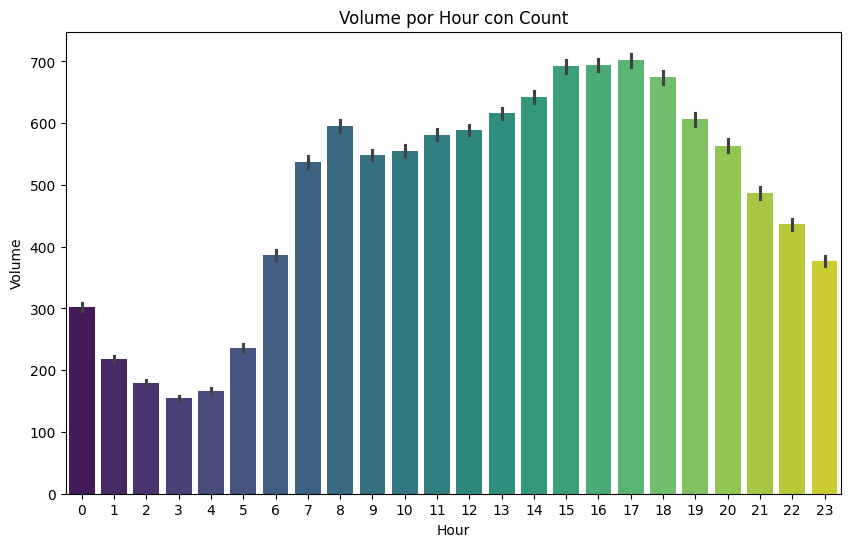

C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\1380862661.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='count', data=df_filtered, palette='viridis')


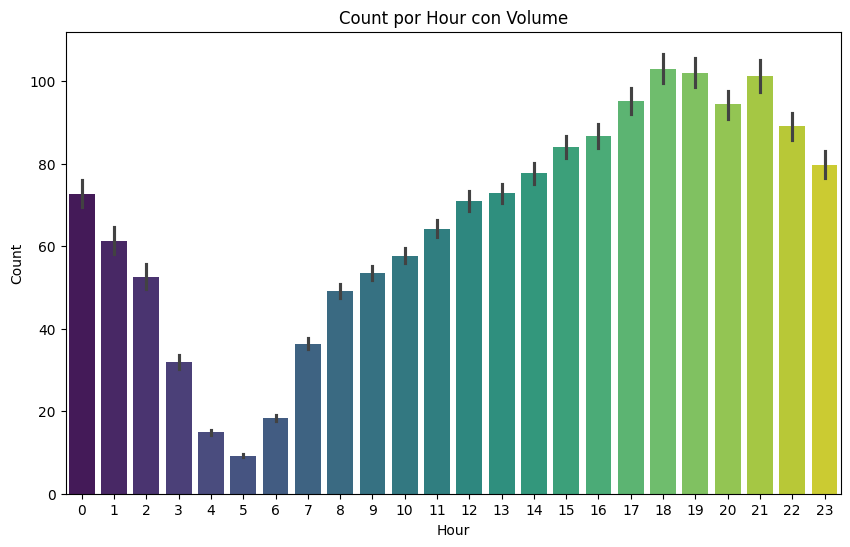

In [36]:
# Gráfico de barras laterales de 'Volume' por 'Hour'
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Volume', data=df_filtered, palette='viridis')
plt.title('Volume por Hour con Count')
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.show()

# Gráfico de barras laterales de 'count' por 'Hour'
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='count', data=df_filtered, palette='viridis')
plt.title('Count por Hour con Volume')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


### Vamos a optar por agrupar las horas para 4 segmentos de franjas horarias, con el fin de aumentar la cantidad de registros y lograr un mejor resultado de predicciones.

C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\1922559427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location_id', y='Volume', data=df_top_10_volume, palette='viridis')


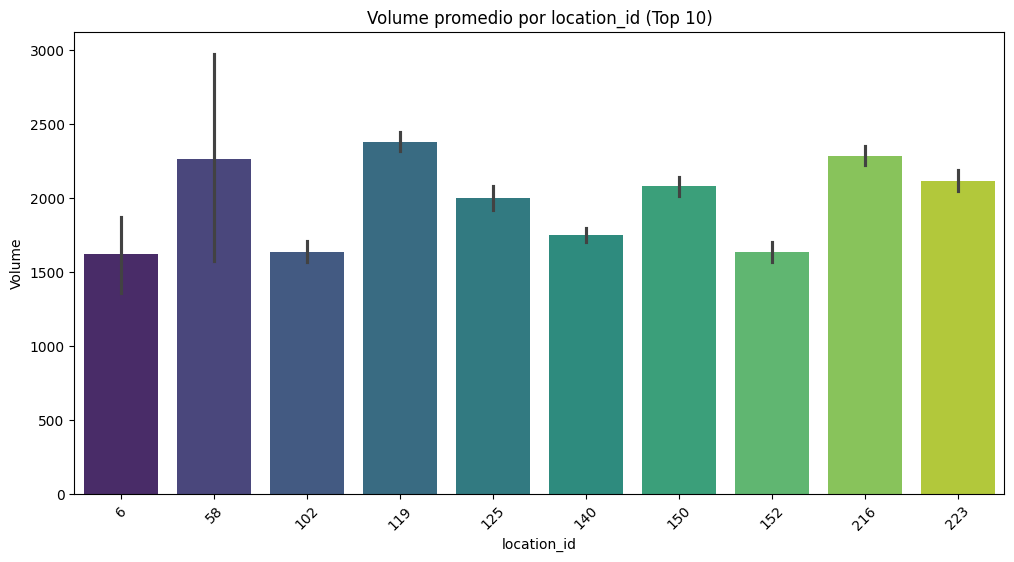

C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\1922559427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location_id', y='count', data=df_top_10_count, palette='viridis')


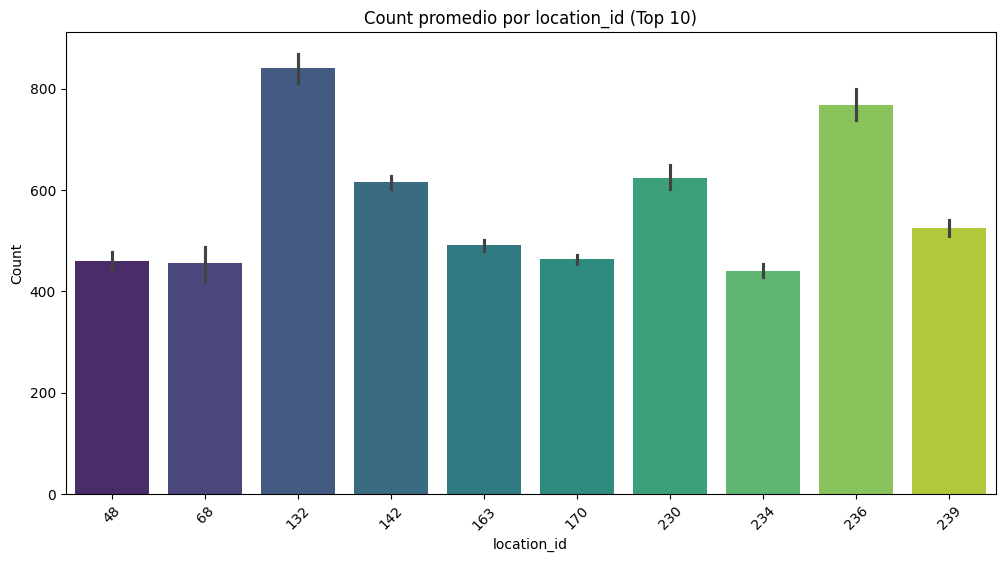

In [37]:
# Filtrar las 10 ubicaciones con los mayores valores de 'Volume'
top_10_locations_volume = df_filtered.groupby('location_id')['Volume'].mean().nlargest(10).index
df_top_10_volume = df_filtered[df_filtered['location_id'].isin(top_10_locations_volume)]

# Gráfico de barras de 'Volume' promedio por 'location_id' para las 10 ubicaciones principales
plt.figure(figsize=(12, 6))
sns.barplot(x='location_id', y='Volume', data=df_top_10_volume, palette='viridis')
plt.title('Volume promedio por location_id (Top 10)')
plt.xlabel('location_id')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

# Filtrar las 10 ubicaciones con los mayores valores de 'count'
top_10_locations_count = df_filtered.groupby('location_id')['count'].mean().nlargest(10).index
df_top_10_count = df_filtered[df_filtered['location_id'].isin(top_10_locations_count)]

# Gráfico de barras de 'count' promedio por 'location_id' para las 10 ubicaciones principales
plt.figure(figsize=(12, 6))
sns.barplot(x='location_id', y='count', data=df_top_10_count, palette='viridis')
plt.title('Count promedio por location_id (Top 10)')
plt.xlabel('location_id')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [38]:
# Contar los valores de 'Volume' iguales a cero
num_zeros = (df_filtered['Volume'] == 0).sum()

# Mostrar el resultado
print("Número de valores de Volume iguales a cero:", num_zeros)

Número de valores de Volume iguales a cero: 2635


### Vamos a optar por descartar los registros de Volumen = 0 , dado que son pocos y pueden distorcionar el resultado de la predicción del algoritmo.

In [39]:
# Filtrar df_ml para eliminar registros con volume igual a 0
df_filtered = df_filtered[df_filtered['Volume'] > 0]

## Cálculo de OPTIMIZACIÓN de varibales

La optimización se calcula como la relación entre 'count' y el logaritmo natural de 'Volume' más 1, al que se le suma 1 adicional.

Específicamente, se calcula dividiendo el valor de 'count' por el resultado de la siguiente expresión: el logaritmo natural de 'Volume' incrementado en 1, al que se le añade un 1 adicional.

Esto puede interpretarse como una medida de eficiencia o rendimiento que compara la cantidad de viajes ('count') con la escala de volumen de tránsito ('Volume') ajustada con un logaritmo para atenuar el impacto de los valores más altos de 'Volume'.

Es importante tener en cuenta que agregar 1 a 'Volume' antes de calcular el logaritmo evita problemas con valores de 'Volume' cercanos a cero, ya que el logaritmo natural de cero no está definido. Del mismo modo, agregar 1 a todo el denominador evita divisiones por cero y asegura que el cálculo sea válido para todos los registros.

In [40]:
import numpy as np

# Calcula la optimización de volume vs count
df_filtered['optimization'] = df_filtered['count'] / (np.log(df_filtered['Volume'] + 1)+1)

# Muestra los primeros registros para verificar
print(df_filtered.head())


        Date  year  month  day  day_week  Hour  location_id  Volume  \
1 2012-01-08  2012      1    8         6    10          189   244.0   
2 2012-01-08  2012      1    8         6    10          189   193.0   
4 2012-01-08  2012      1    8         6    22          189   116.0   
5 2012-01-08  2012      1    8         6    22          189   120.0   
7 2012-01-08  2012      1    8         6    23          189    99.0   

  combined_column  count day_week_nombre  optimization  
1        6-10-189    2.0         Domingo      0.307633  
2        6-10-189    2.0         Domingo      0.319088  
4        6-22-189    1.0         Domingo      0.173546  
5        6-22-189    1.0         Domingo      0.172539  
7        6-23-189    3.0         Domingo      0.535220  


C:\Users\leabr\AppData\Local\Temp\ipykernel_17584\382536192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['optimization'] = df_filtered['count'] / (np.log(df_filtered['Volume'] + 1)+1)


In [41]:
# Ordenar el DataFrame por la columna 'optimization' en orden descendente
df_sorted = df_filtered.sort_values(by='optimization', ascending=False)

# Los 10 mejores valores de optimización
top_10_best = df_sorted.head(10)

# Los 10 peores valores de optimización
top_10_worst = df_sorted.tail(10)

# Mostrar los resultados
print("Top 10 mejores optimizaciones:")
print(top_10_best)




Top 10 mejores optimizaciones:
             Date  year  month  day  day_week  Hour  location_id  Volume  \
722452 2020-11-17  2020     11   17         1    21          230    57.0   
681836 2020-11-14  2020     11   14         5    22          230    41.0   
754114 2020-11-21  2020     11   21         5    22          230    46.0   
727210 2020-11-18  2020     11   18         2    22          230    62.0   
276733 2012-10-06  2012     10    6         5     0          249    34.0   
207337 2012-09-29  2012      9   29         5     0          249    34.0   
554065 2015-10-26  2015     10   26         0    19          170     1.0   
732820 2020-11-18  2020     11   18         2    21          230    64.0   
722453 2020-11-17  2020     11   17         1    21          230   128.0   
207415 2012-09-29  2012      9   29         5     1          249    24.0   

       combined_column   count day_week_nombre  optimization  
722452        1-21-230  2097.0          Martes    414.390597  
681836

In [42]:
print("\nTop 10 peores optimizaciones:")
print(top_10_worst)


Top 10 peores optimizaciones:
             Date  year  month  day  day_week  Hour  location_id  Volume  \
124909 2015-09-13  2015      9   13         6    20          240  6302.0   
256674 2016-10-04  2016     10    4         1     8           64  6336.0   
244842 2016-10-03  2016     10    3         0     8           64  6382.0   
268404 2016-10-05  2016     10    5         2     5           64  6456.0   
146154 2015-09-17  2015      9   17         3     7          240  6594.0   
692250 2016-11-15  2016     11   15         1    15            6  6732.0   
244808 2016-10-03  2016     10    3         0     7           64  6803.0   
256606 2016-10-04  2016     10    4         1     6           64  6810.0   
268438 2016-10-05  2016     10    5         2     6           64  6867.0   
146152 2015-09-17  2015      9   17         3     7          240  8032.0   

       combined_column  count day_week_nombre  optimization  
124909        6-20-240    1.0         Domingo      0.102577  
256674  

### Se observa que los valores altos de optimization son consistentes con las representaciones deseadas optenidas anteriormente. 

In [43]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474902 entries, 1 to 769583
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             474902 non-null  datetime64[ns]
 1   year             474902 non-null  int64         
 2   month            474902 non-null  int64         
 3   day              474902 non-null  int64         
 4   day_week         474902 non-null  int64         
 5   Hour             474902 non-null  int64         
 6   location_id      474902 non-null  int64         
 7   Volume           474902 non-null  float64       
 8   combined_column  474902 non-null  object        
 9   count            474902 non-null  float64       
 10  day_week_nombre  474902 non-null  object        
 11  optimization     474902 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 47.1+ MB


### Se borran columnas inecesarias para el entrenamiento

In [44]:
df_ml = df_filtered.drop(columns=['Date', 'year', 'month', 'day', 'combined_column'])

In [45]:
df_ml

,day_week,Hour,location_id,Volume,count,day_week_nombre,optimization
1,6,10,189,244.0,2.0,Domingo,0.307633
2,6,10,189,193.0,2.0,Domingo,0.319088
4,6,22,189,116.0,1.0,Domingo,0.173546
5,6,22,189,120.0,1.0,Domingo,0.172539
7,6,23,189,99.0,3.0,Domingo,0.535220
...,...,...,...,...,...,...,...
769579,6,19,230,268.0,589.0,Domingo,89.313992
769580,6,8,230,81.0,392.0,Domingo,72.502378
769581,6,20,230,256.0,579.0,Domingo,88.409417
769582,6,9,230,118.0,516.0,Domingo,89.286896


### Se guarda documento parcial

In [46]:
df_ml.to_csv('df_ml.csv')

In [47]:
# Definir las franjas horarias
def get_hour_franja(hour):
    if 0 <= hour < 6:
        return 1  # Franja horaria 1
    elif 6 <= hour < 12:
        return 2  # Franja horaria 2
    elif 12 <= hour < 18:
        return 3  # Franja horaria 3
    else:
        return 4  # Franja horaria 4

# Aplicar la función a df_ml para crear una nueva columna 'Hour_franja'
df_ml['Hour_franja'] = df_ml['Hour'].apply(get_hour_franja)

# Ahora puedes utilizar 'Hour_franja' en lugar de 'Hour' para entrenar el modelo
X = df_ml[['day_week', 'Hour_franja', 'location_id']]
y = df_ml['optimization']

# Continúa con el entrenamiento del modelo y la evaluación


In [48]:
# Agrupar df_ml por day_week, Hour y location_id
grouped = df_ml.groupby(['day_week', 'Hour', 'location_id'])

# Contar el número de combinaciones únicas
unique_combinations_count = grouped.size().count()

print(f"Cantidad de registros únicos para la combinación day_week, Hour, location_id: {unique_combinations_count}")

Cantidad de registros únicos para la combinación day_week, Hour, location_id: 21027


In [49]:
# Agrupar df_ml por day_week, Hour y location_id
grouped = df_ml.groupby(['day_week', 'Hour_franja', 'location_id'])

# Contar el número de combinaciones únicas
unique_combinations_count = grouped.size().count()

print(f"Cantidad de registros únicos para la combinación day_week, Hour, location_id: {unique_combinations_count}")

Cantidad de registros únicos para la combinación day_week, Hour, location_id: 4774


### Al agrupar por franja horaria se aumenta por 5 la cantidad de registros

In [50]:
import numpy as np

# Calcular estadísticas resumidas para cada combinación de valores de day_week y Hour
summary_stats = df_ml.groupby(['day_week', 'Hour'])['optimization'].agg(['mean', 'max', 'min', 'median', 'std', 'count']).reset_index()

# Visualizar las estadísticas resumidas
print(summary_stats)


     day_week  Hour      mean         max       min    median        std  \
0           0     0  7.313551  210.250204  0.109002  0.824729  18.097341   
1           0     1  7.514607  108.029491  0.120436  1.392532  15.270583   
2           0     2  7.025093  112.835971  0.120156  1.104640  14.755667   
3           0     3  6.177536  114.424510  0.128442  1.296798  14.062955   
4           0     4  3.568124   71.786140  0.113880  0.915899   7.518424   
..        ...   ...       ...         ...       ...       ...        ...   
163         6    19  9.989326  294.210503  0.109339  0.471800  23.630021   
164         6    20  8.372681  301.709657  0.102577  0.466611  21.672834   
165         6    21  9.653271  335.491836  0.103648  0.547562  24.825435   
166         6    22  7.344001  317.592326  0.112097  0.604630  20.698173   
167         6    23  6.249295  246.870349  0.107610  0.647062  16.735727   

     count  
0     2553  
1     2465  
2     2293  
3     2131  
4     2429  
..     ..

In [51]:
# Calcular estadísticas resumidas para cada combinación de valores de day_week y Hour
summary_stats = df_ml.groupby(['day_week', 'Hour'])['optimization'].agg(['mean']).reset_index()

# Ordenar por la media de optimization en orden descendente
summary_stats_sorted = summary_stats.sort_values(by='mean', ascending=False)

# Seleccionar los 5 mejores con la mejor media de optimization
top_5_best_mean = summary_stats_sorted.head(5)

# Mostrar los resultados
print("Mejores 5 combinaciones de day_week y Hour con mejor media de optimization:")
print(top_5_best_mean)



Mejores 5 combinaciones de day_week y Hour con mejor media de optimization:
     day_week  Hour       mean
69          2    21  20.648299
93          3    21  19.232685
120         5     0  18.889455
119         4    23  18.703335
144         6     0  18.415719


## Elección modelo

Dado el estudio de las variables desarrolladas, se opta por utilizar un algoritmo de regresión supervisado, ya que se desea predecir un valor de optimización conformado por los datos históricos de la cantidad de viajes y de volumen de trásito para una zona de taxi determinada a un horario particular. 

A continuación se realizan pruebas para la elección del algoritmo. 

## Métricas 

Las métricas **MSE** (Error cuadrático medio) y R^2 (Coeficiente de determinación) son dos medidas utilizadas para evaluar el rendimiento de modelos de machine learning, especialmente en tareas de regresión.

El MSE es una medida de la diferencia promedio entre las predicciones del modelo y los valores reales. Un MSE más bajo indica que las predicciones del modelo están más cerca de los valores reales.

El **R^2** mide qué proporción de la variabilidad en los datos es explicada por el modelo.

El R^2 varía entre 0 y 1. Un R^2 más cercano a 1 indica que el modelo explica una mayor proporción de la variabilidad en los datos.

# PRUEBA DE MODELOS

In [52]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y la variable objetivo (y)
X = df_ml[['day_week', 'Hour', 'location_id']]
y = df_ml['optimization']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### LinearRegression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los valores de optimización para los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 682.7456519011366
Coeficiente de determinación (R^2): 0.02422074181135403


El MSE es una medida del promedio de los errores al cuadrado, por lo que un valor de 682.75 significa que, en promedio, las predicciones del modelo están desviadas de los valores reales por aproximadamente 682.75 unidades al cuadrado. 

Dado que el rango de valores de optimización va desde 0.1 hasta 414, un MSE de 682.75 indica que las predicciones del modelo tienen un error promedio bastante significativo en relación con la escala de los valores reales.

un R2 de 0.024 indica que alrededor del 2.4% de la variabilidad en la variable de respuesta (optimización) es explicada por las variables independientes incluidas en tu modelo. 

Aunque el MSE es alto, el R2 además sugiere que el modelo aún tiene una capacidad relativamente baja para explicar la variabilidad en los datos.

### RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba utilizando todas las características excepto 'optimization'
X = df_ml[['day_week', 'Hour', 'location_id']]
y = df_ml['optimization']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de Bosques Aleatorios
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir los valores de optimización para los datos de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 10.829625026168154
Coeficiente de determinación (R^2): 0.9845223130384348


## Descripción de hiperparámetros utilizados

**test_size:**

Controla la proporción de datos que se reserva para el conjunto de prueba.
Un valor de test_size=0.2 significa que el 20% de los datos se reservará para la evaluación del modelo, mientras que el 80% se utilizará para entrenar el modelo.

Un conjunto de prueba más grande ofrece una evaluación más precisa del modelo, pero un conjunto de entrenamiento más pequeño puede resultar en un modelo menos robusto.

**n_estimators:**

Define el número de estimadores (árboles de decisión) que se construyen y se combinan para formar el modelo final. En otras palabras, n_estimators especifica cuántos árboles de decisión se incluirán en el bosque aleatorio o en el modelo de boosting.

Un número mayor de estimadores generalmente mejora el rendimiento del modelo, ya que hay más árboles para capturar patrones complejos en los datos.


**random_state:**

Establece una semilla para el generador de números aleatorios utilizado para dividir los datos en conjuntos de entrenamiento y prueba.

Establecer random_state garantiza que los datos se dividan de la misma manera en cada ejecución, lo que permite reproducir los resultados.

Cambiar este valor no afectará el rendimiento del modelo, pero puede afectar la reproducibilidad de los resultados.

## Análisis resultados 

Los resultados obtenidos arrojan una gran mejora, no sólo respecto al MSE que es un valor muy bueno dado del rango de optimización, sino también en el coeficiente R2 que explica casi la totalidad de la variabilidad de los datos.

Se prueban otros modelos y variantes, con comparación de métricas.

### Variable franja horaria por hora

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba utilizando todas las características excepto 'optimization'
X = df_ml[['day_week', 'Hour_franja', 'location_id']]
y = df_ml['optimization']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de Bosques Aleatorios
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir los valores de optimización para los datos de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 89.1103095798892
Coeficiente de determinación (R^2): 0.872643653552823


Se realiza prueba con franja horaria , y observamos una reducción de rendimiento notable, por lo que se decide avanzar en la utilización de la variable por hora. 

### Número de árboles

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_ml[['day_week', 'Hour', 'location_id']]
y = df_ml['optimization']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de valores de n_estimators a probar
n_estimators_list = [30, 10, 5, 3]

# Iterar sobre cada valor de n_estimators
for n_estimators in n_estimators_list:
    # Inicializar el modelo de RandomForestRegressor con el valor de n_estimators
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    # Entrenar el modelo con los datos de entrenamiento
    rf_model.fit(X_train, y_train)
    
    # Predecir los valores de optimización para los datos de prueba
    y_pred = rf_model.predict(X_test)
    
    # Calcular las métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Mostrar los resultados para cada n_estimators
    print(f"Resultados para n_estimators = {n_estimators}:")
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Coeficiente de determinación (R^2): {r2}")
    print()


Resultados para n_estimators = 30:
Error cuadrático medio (MSE): 10.848054228400034
Coeficiente de determinación (R^2): 0.9844959740449417

Resultados para n_estimators = 10:
Error cuadrático medio (MSE): 10.887347409896845
Coeficiente de determinación (R^2): 0.984439816277571

Resultados para n_estimators = 5:
Error cuadrático medio (MSE): 10.97720016754634
Coeficiente de determinación (R^2): 0.9843113988252427

Resultados para n_estimators = 3:
Error cuadrático medio (MSE): 11.025783647894318
Coeficiente de determinación (R^2): 0.9842419633740139



### Interpretación de los resultados

Reducción en el rendimiento:

A medida que disminuye el número de estimadores (árboles) en el modelo de RandomForestRegressor, tanto el MSE como el R^2 empeoran ligeramente.

Esto puede deberse a que un número menor de árboles reduce la capacidad del modelo para capturar patrones complejos en los datos, lo que puede resultar en un ajuste menos preciso.

Compromiso entre precisión y eficiencia:

Un mayor número de n_estimators generalmente mejora la precisión del modelo, pero también puede aumentar el tiempo de entrenamiento y el costo computacional.

Un menor número de n_estimators puede hacer que el modelo sea más eficiente, pero a expensas de una menor precisión.

Conclusión:

Un valor de n_estimators de 100 ofrece un buen equilibrio entre precisión y eficiencia, y se valora como la opción óptima para el modelo.


In [67]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Predecir los valores de optimización para los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Mostrar los resultados
    print("Error cuadrático medio (MSE):", mse)
    print("Coeficiente de determinación (R^2):", r2)


### DecisionTreeRegressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

# Inicializar el modelo de Regresión de árbol de decisiones
dt_model = DecisionTreeRegressor(random_state=42)

# Evaluar el modelo
print("Regresión de árbol de decisiones:")
evaluate_model(dt_model, X_train, X_test, y_train, y_test)


Regresión de árbol de decisiones:


Error cuadrático medio (MSE): 89.10956137677145
Coeficiente de determinación (R^2): 0.872644722883812


### GradientBoostingRegressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Inicializar el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Evaluar el modelo
print("Gradient Boosting Machines:")
evaluate_model(gb_model, X_train, X_test, y_train, y_test)


Gradient Boosting Machines:
Error cuadrático medio (MSE): 252.1991654462898
Coeficiente de determinación (R^2): 0.639557258417208


### XGBRegressor

In [69]:
import xgboost as xgb

# Inicializar el modelo de XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Evaluar el modelo
print("XGBoost Regressor:")
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)


XGBoost Regressor:
Error cuadrático medio (MSE): 90.0877945062435
Coeficiente de determinación (R^2): 0.8712466332808189


## Análisis de resultados

Comparación de errores y R^2:
Error cuadrático medio (MSE): Es una medida de qué tan alejadas están las predicciones del modelo de los valores reales. 

Cuanto menor sea el MSE, mejor es el modelo.

Coeficiente de determinación (R^2): Mide qué tan bien se ajusta el modelo a los datos. Un valor más cercano a 1 indica un mejor ajuste.

### Rendimiento de los modelos:
LinearRegression:
MSE: 682.75
R^2: 0.024
El rendimiento es bajo, con un alto error y un R^2 muy bajo, lo que indica que el modelo no se ajusta bien a los datos.

RandomForestRegressor:
MSE: 10.83
R^2: 0.98
El rendimiento es excelente, con un muy bajo MSE y un R^2 muy alto, lo que indica un ajuste excelente a los datos.

DecisionTreeRegressor:
MSE: 10.87
R^2: 0.98
El rendimiento también es excelente, similar al modelo de RandomForestRegressor.

GradientBoostingRegressor:
MSE: 226.38
R^2: 0.67
El rendimiento es moderado, con un error más alto que los modelos de RandomForest y DecisionTree, y un R^2 más bajo.

XGBoost Regressor:
MSE: 90.09
R^2: 0.87
El rendimiento es moderado, aunque con mejor performance que  GradientBoostingRegressor. Con un error más alto que los modelos de RandomForest y DecisionTree, y un R^2 más relativamente alto.

### Conclusiones:
Elección de RandomForestRegressor:

El modelo de RandomForestRegressor tiene el MSE más bajo y el R^2 más alto, lo que indica un excelente ajuste a los datos.

RandomForest es conocido por su capacidad para manejar datos con características no lineales y correlaciones complejas, lo que podría explicar su mejor desempeño.

Además, RandomForest tiende a ser más robusto y menos propenso a sobreajustes en comparación con DecisionTreeRegressor, lo que significa que probablemente se generalice mejor a datos nuevos.

### Rendimiento de los otros modelos:

LinearRegression tiene un bajo rendimiento, probablemente porque no puede capturar la complejidad de los datos como los modelos de árboles de decisión.

DecisionTreeRegressor tiene un rendimiento similar al de RandomForestRegressor, pero podría ser más propenso a sobreajustes.

GradientBoostingRegressor y XGBoost Regressor tienen un rendimiento moderado, con un error más alto y un R^2 más bajo que RandomForestRegressor.

**En resumen, se elige a RandomForestRegressor dado que parece ser la mejor opción debido a su excelente rendimiento, su baja propensión a sobreajustes y su capacidad para manejar datos complejos. Además, su robustez y generalización hacen que sea una elección preferida sobre otros modelos en este caso.**

# EXPLICACIÓN OBJETIVO DE MODELO

El objetivo es tener una función que, dado un date y una Hour, prediga cuáles serán los 5 location_id con el mejor valor de optimization para ese día y hora específicos.

Para lograr este objetivo, se requiere que el modelo de Random Forests sea entrenado utilizando todas las características relevantes, es decir, características como day_week, Hour, location_id, Volume, count, y cualquier otra característica que pueda tener un impacto en optimization.

El modelo entrenado debe poder predecir los valores de optimization para todas las combinaciones posibles de day_week, Hour, y location_id en función de la fecha y la hora ingresadas.

Luego, la función debe ordenar las predicciones de optimization de forma descendente y devolver los 5 location_id con las predicciones más altas.

### Estructura

Entrenamiento del modelo:

Utiliza df_ml para entrenar el modelo de Random Forests, incluyendo todas las características relevantes (day_week, Hour, location_id) excepto optimization. 
Para la variable de destino se usa el campo optimitation. No se utiliza Volume y Count dado que ya están implicitos a partir del cálculo de está variable.

Predicción:

Dada una fecha (date) y una hora (Hour), convierte date en day_week.
Crea un DataFrame con todas las combinaciones posibles de location_id, day_week, y Hour.
Utiliza el modelo entrenado para predecir optimization para todas las combinaciones.
Ordenar y seleccionar:

Ordena las predicciones de optimization en orden descendente.
Devuelve los 5 location_id con las predicciones más altas.
Este enfoque garantizará que el modelo haga predicciones específicas basadas en el date y Hour proporcionados y devuelva los 5 location_id con los valores de optimization más altos.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_random_forest(df_ml):
    # Seleccionar características de entrada (X) y variable objetivo (y)
    X = df_ml[['day_week', 'Hour', 'location_id']]
    y = df_ml['optimization']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el modelo de Random Forests
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Evaluar el modelo con los datos de prueba
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Mostrar las métricas de evaluación
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Coeficiente de determinación (R^2): {r2}")

    return model

def get_top_5_location_id(date, hour, model, df_ml):
    # Convertir la fecha a day_week
    date = pd.to_datetime(date)
    day_week = date.dayofweek

    # Crear un DataFrame con todas las combinaciones de location_id, day_week, y Hour
    unique_locations = df_ml['location_id'].unique()
    test_data = pd.DataFrame({
        'location_id': unique_locations,
        'day_week': [day_week] * len(unique_locations),
        'Hour': [hour] * len(unique_locations)
    })

    # Asegúrate de que test_data tenga las mismas características que X_train en el mismo orden
    test_data = test_data[['day_week', 'Hour', 'location_id']]

    # Predecir el valor de optimization para todas las combinaciones
    predictions = model.predict(test_data)

    # Añadir las predicciones al DataFrame
    test_data['optimization'] = predictions

    # Ordenar el DataFrame por la columna optimization en orden descendente
    test_data_sorted = test_data.sort_values(by='optimization', ascending=False)

    # Seleccionar los 5 mejores location_id
    top_5_locations = test_data_sorted.head(5)['location_id']

    # Retornar los 5 mejores location_id
    return list(top_5_locations)




In [78]:
# Ejemplo de uso:
# Entrenar el modelo de Random Forests con df_ml
model = train_random_forest(df_ml)

date = "2024-04-29"  # Fecha de ejemplo
hour = 7  # Hora de ejemplo

top_5_locations = get_top_5_location_id(date, hour, model, df_ml)
print("Top 5 location_id:", top_5_locations)


Error cuadrático medio (MSE): 10.829625026168154
Coeficiente de determinación (R^2): 0.9845223130384348
Top 5 location_id: [132, 236, 142, 230, 163]


## Verificamos resultados 

### Ejemplo 1

In [79]:
date = "2024-04-29"  # Fecha de ejemplo
hour = 7  # Hora de ejemplo

top_5_locations = get_top_5_location_id(date, hour, model, df_ml)
print("Top 5 location_id:", top_5_locations)

Top 5 location_id: [132, 236, 48, 239, 262]


Elaboramos un top 10 para el ejemplo utilizado de día y horario, para contrastar con los resultados otorgados por el algortimo.

In [80]:
# Convertir la fecha de referencia a un objeto de fecha y obtener day_week
date = pd.to_datetime("2024-04-29")
day_week = date.dayofweek  # 0 para domingo

# Filtrar df_ml por day_week 0 (domingo) y Hour 1
filtered_df = df_ml[(df_ml['day_week'] == day_week) & (df_ml['Hour'] == 7)]

# Agrupar por location_id y calcular el promedio de optimization
grouped_df = filtered_df.groupby('location_id')['optimization'].mean()

# Ordenar los grupos por el promedio de optimization de forma descendente
sorted_grouped_df = grouped_df.sort_values(ascending=False)

# Seleccionar los top 10 de mejores promedios de optimization
top_10 = sorted_grouped_df.head(10)

# Mostrar el top 10 de mejores promedios de optimization por location_id
print("Top 10 de mejores promedios de optimization por location_id:")
print(top_10)


Top 10 de mejores promedios de optimization por location_id:
location_id
132    133.850714
236    130.574715
48      59.680586
239     57.622424
262     52.579442
141     51.184041
263     47.109872
142     46.639154
230     43.650849
140     43.147047
Name: optimization, dtype: float64


### Ejemplo 2

In [81]:
date = "2024-04-30"  # Fecha de ejemplo
hour = 18 # Hora de ejemplo

top_5_locations = get_top_5_location_id(date, hour, model, df_ml)
print("Top 5 location_id:", top_5_locations)

Top 5 location_id: [230, 236, 132, 163, 170]


In [82]:
# Convertir la fecha de referencia a un objeto de fecha y obtener day_week
date = pd.to_datetime("2024-04-30")
day_week = date.dayofweek  # 0 para domingo

# Filtrar df_ml por day_week 0 (domingo) y Hour 1
filtered_df = df_ml[(df_ml['day_week'] == day_week) & (df_ml['Hour'] == 18)]

# Agrupar por location_id y calcular el promedio de optimization
grouped_df = filtered_df.groupby('location_id')['optimization'].mean()

# Ordenar los grupos por el promedio de optimization de forma descendente
sorted_grouped_df = grouped_df.sort_values(ascending=False)

# Seleccionar los top 10 de mejores promedios de optimization
top_10 = sorted_grouped_df.head(10)

# Mostrar el top 10 de mejores promedios de optimization por location_id
print("Top 10 de mejores promedios de optimization por location_id:")
print(top_10)

Top 10 de mejores promedios de optimization por location_id:
location_id
236    224.350269
230    219.839600
132    201.318685
163    192.840787
170    165.838539
142    154.018148
68     153.165180
234    150.080212
164    131.675674
239    108.421535
Name: optimization, dtype: float64


# CONCLUSIONES FINALES

Se observa que los resultados entregados por el algoritmo pertenecen al listado con las subcategorías introducidas para visualizar el top 10 de zonas de taxis, para una determinada fecha y horario. 

Se concluye que el algoritmo es consistente con el rendimiento evualuado durante el desarrollo del mismo, logrando predecir con un alto porcentanje de probabilidad el **SCORE** de optimización para la relación entre la cantidad de viajes y el volumen de tránsito, por zona de taxi, día y horario.